In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(r"hoursStudy.csv")

In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


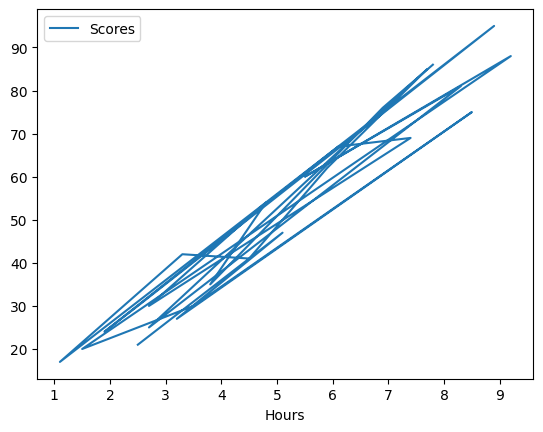

In [ ]:
import matplotlib.pyplot as plt
df.plot(x='Hours',y='Scores')

plt.show()

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3, random_state=0)

In [ ]:
X_train

array([[6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
y_train

array([76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95, 41])

In [ ]:
from sklearn.linear_model import LinearRegression
train_regressor = LinearRegression()
train_regressor.fit(X_train, y_train)



LinearRegression()

In [ ]:
train_regressor.coef_

array([9.78856669])

In [ ]:
train_regressor.intercept_

2.3708153823418883

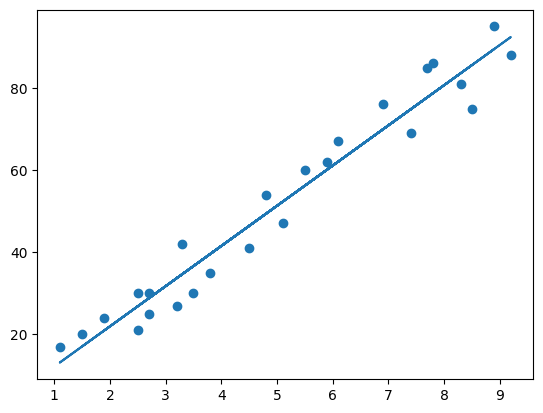

In [ ]:
line = train_regressor.coef_*X+train_regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


In [ ]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9],
       [7.8]])

In [ ]:
y_pred = train_regressor.predict(X_test)

In [ ]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [ ]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86])

In [ ]:
df = pd.DataFrame({'Actual SH': y_test, 'Predicted SH': y_pred})
df

,Actual SH,Predicted SH
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [ ]:
hours = 9.25
pred = train_regressor.predict([[hours]])
print("Actual Hours", hours)
print("Predicted Hours", pred[0])

Actual Hours 9.25
Predicted Hours 92.91505723477056


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4.7921912746363144
